In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np


def dilatacao(img, kernel, center=[-1,-1]):

    linhas = img.shape[0]
    colunas = img.shape[1]

    if(center == [-1,-1]):
        center[0] = (int)(kernel.shape[0] / 2)
        center[1] = (int)(kernel.shape[1] / 2)

    NORM = 50

    img_pad = np.zeros((linhas + 2 * NORM, colunas + 2 * NORM))

    i = (int)(0)
    while(i < kernel.shape[0]):
        j = (int)(0)
        while(j < kernel.shape[1]):
            
            if(kernel[i,j] == 0):
                j += 1
                continue

            a = (int)(i - center[0])
            b = (int)(j - center[1])

            img_pad[ a+NORM:a+linhas+NORM, b+NORM:b+colunas+NORM ] += img

            j += 1
        i += 1

    img2 = img_pad[ NORM:linhas+NORM , NORM:colunas+NORM ]

    img2 = np.minimum(img2, 255)

    return img2

def erosao(img, kernel, center=[-1,-1]):

    kernel = 255 * kernel

    linhas = img.shape[0]
    colunas = img.shape[1]

    if(center == [-1,-1]):
        center[0] = (int)(kernel.shape[0] / 2)
        center[1] = (int)(kernel.shape[1] / 2)

    NORM = 50

    img2 = np.zeros((linhas, colunas))
    img_pad = np.zeros((linhas + 2 * NORM, colunas + 2 * NORM))
    img_pad[ NORM:NORM+linhas, NORM:NORM+colunas ] = img

    i = (int)(0)
    while(i < linhas):
        j = (int)(0)
        while(j < colunas):

            a = (int)(i - center[0])
            b = (int)(j - center[1])
            
            if(np.min(img_pad[ a+NORM:a+kernel.shape[0]+NORM, b+NORM:b+kernel.shape[1]+NORM] - kernel) >= 0):
                img2[i,j] = 255

            j += 1
        i += 1

    return img2

def Circle(r):
    kernel = np.zeros((2 * r + 1,2 * r + 1))
    cv2.circle(kernel, (r,r), r, 1, -1)
    return kernel

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


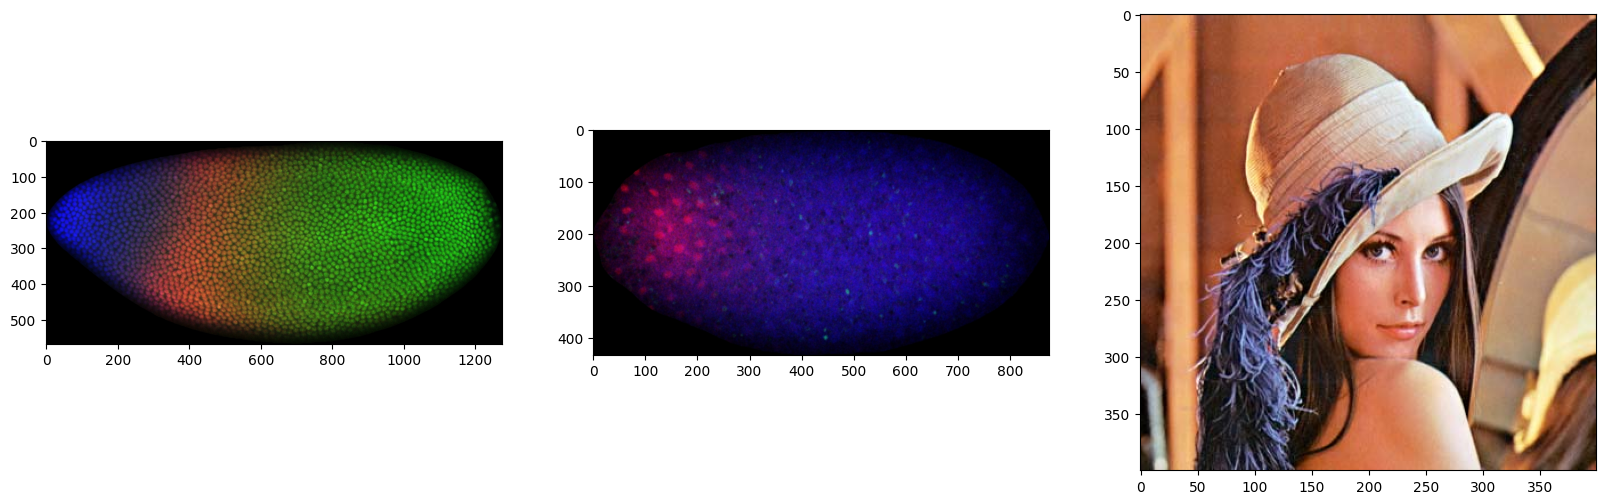

In [2]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)



plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(img1RGB);
plt.subplot(1, 3, 2)
plt.imshow(img2RGB);
plt.subplot(1, 3, 3)
plt.imshow(img3RGB);


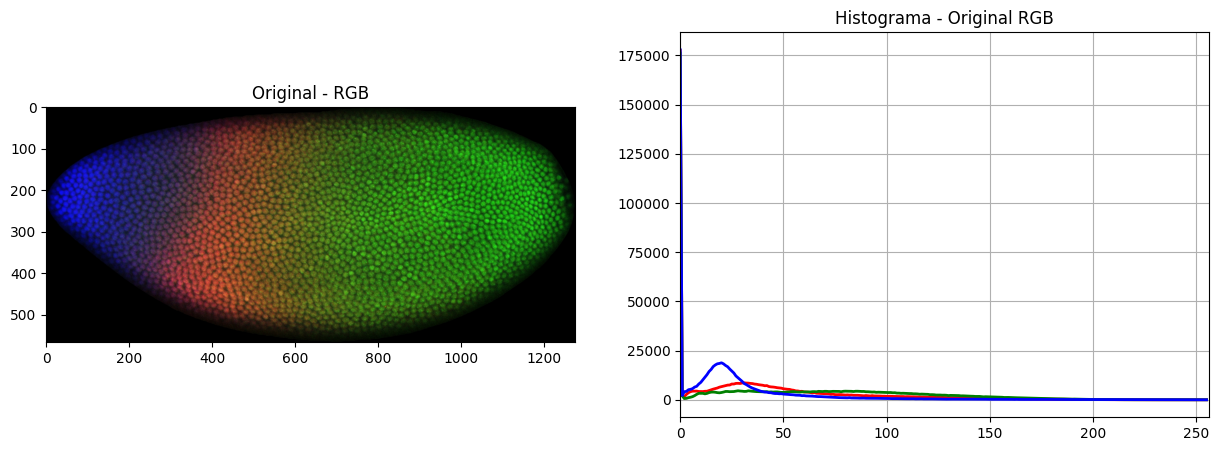

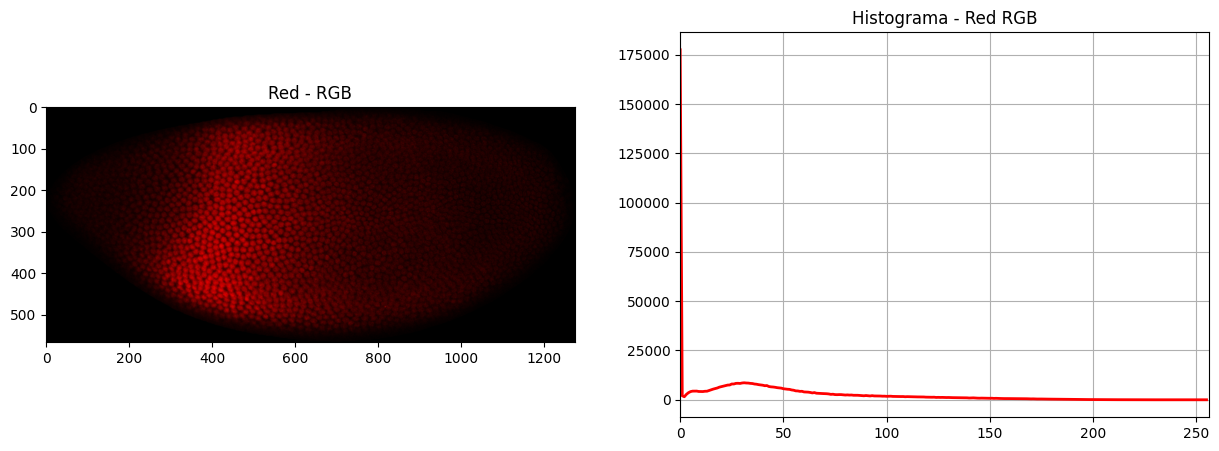

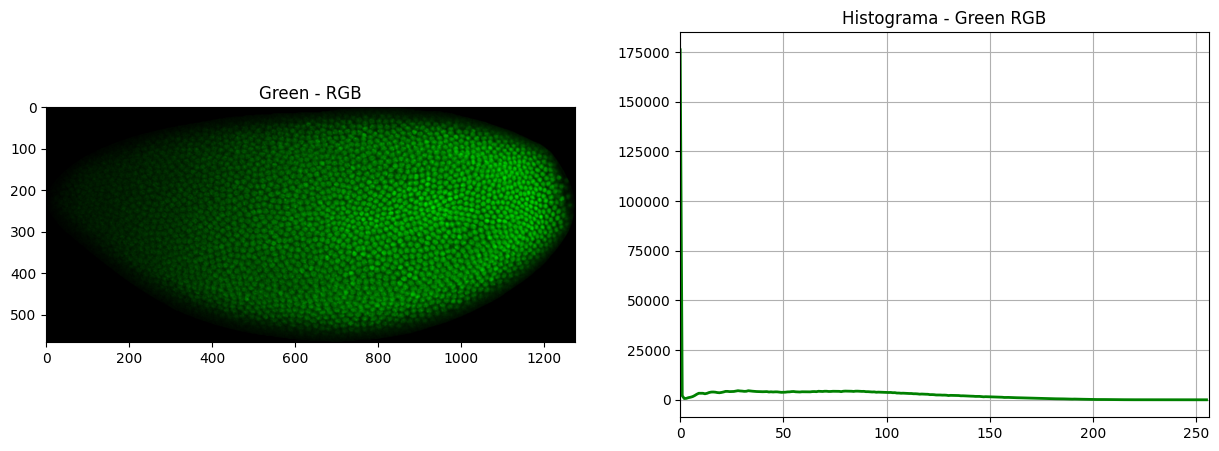

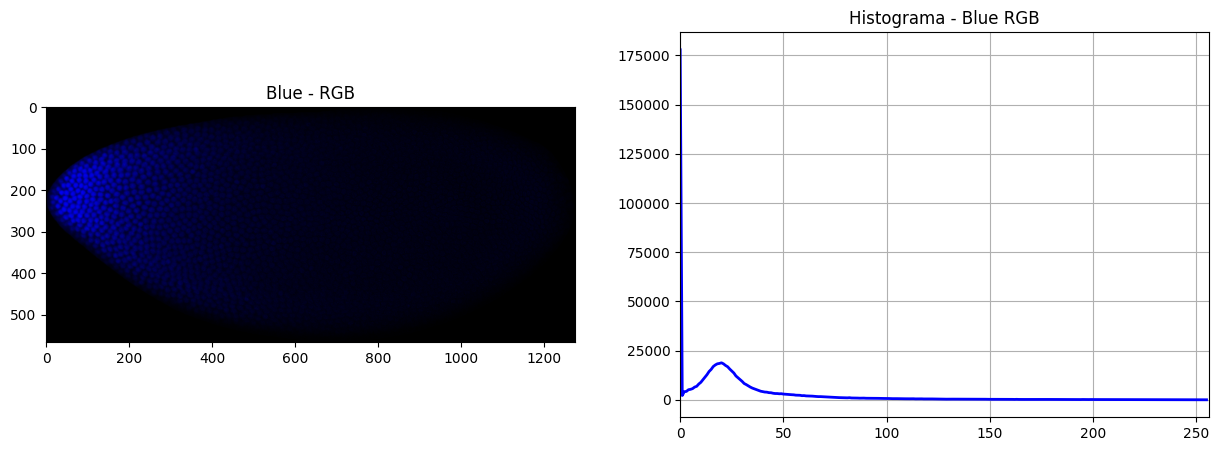

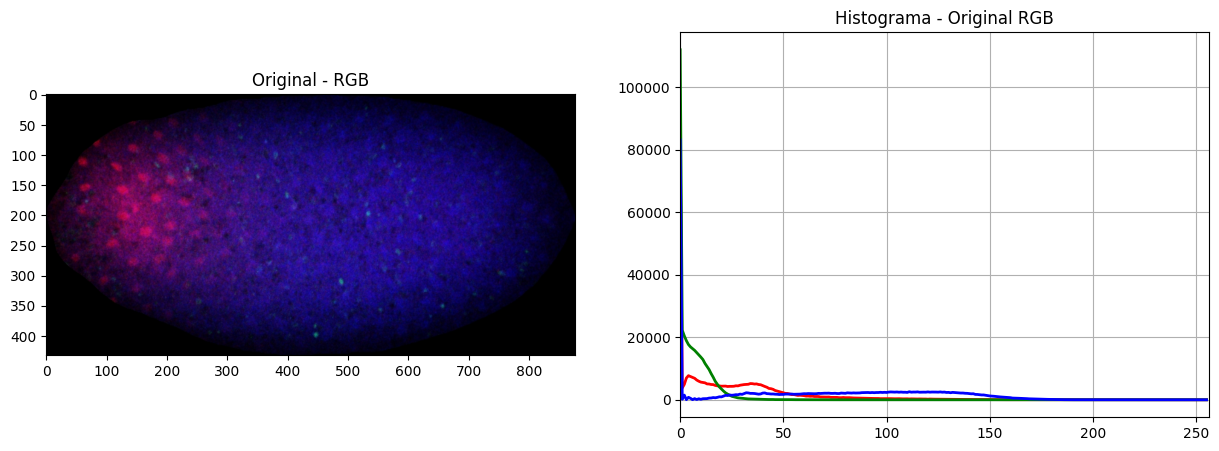

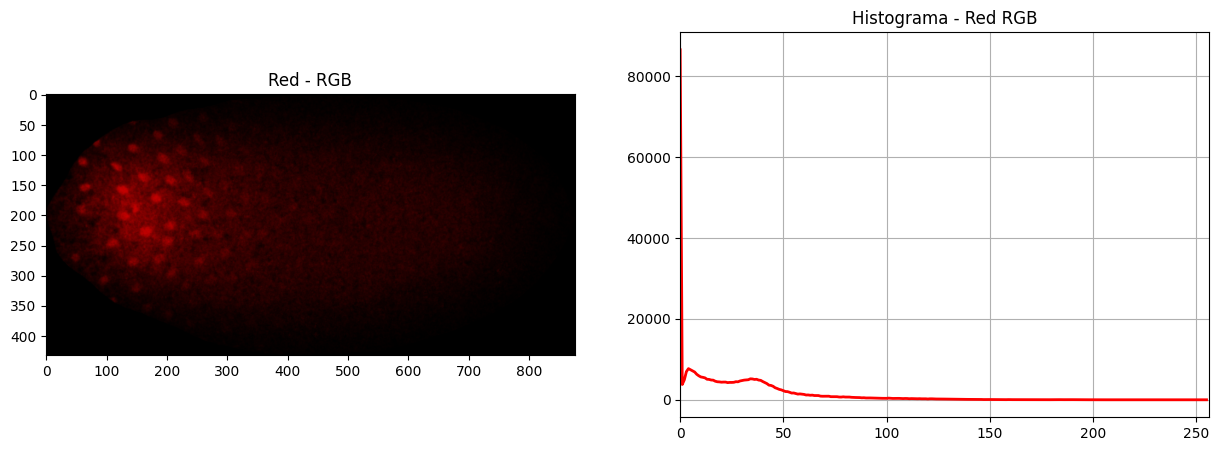

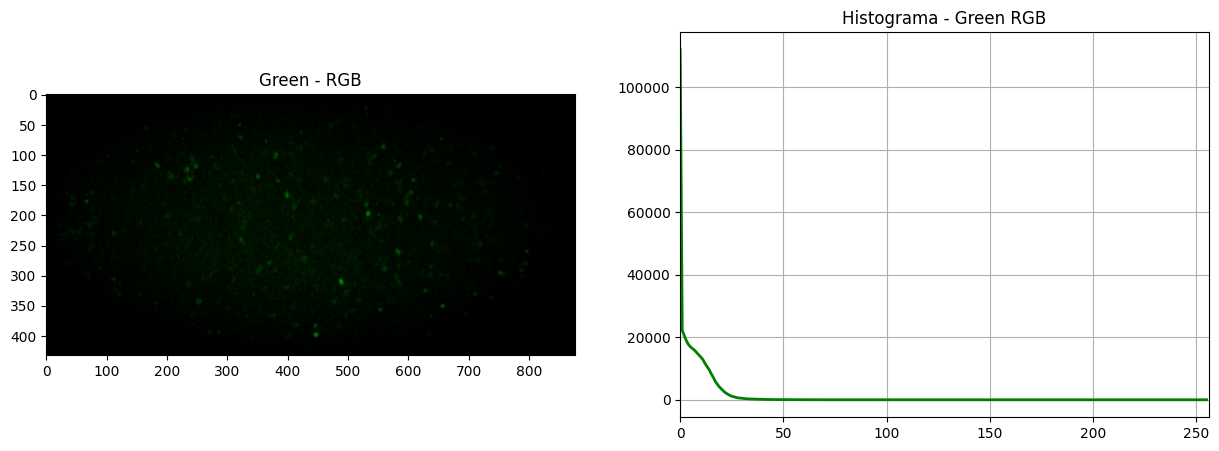

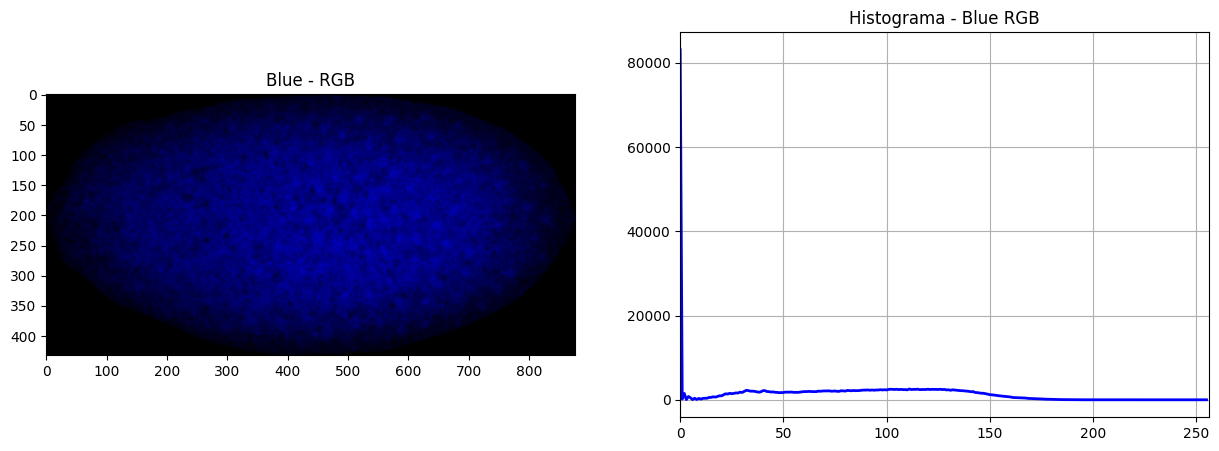

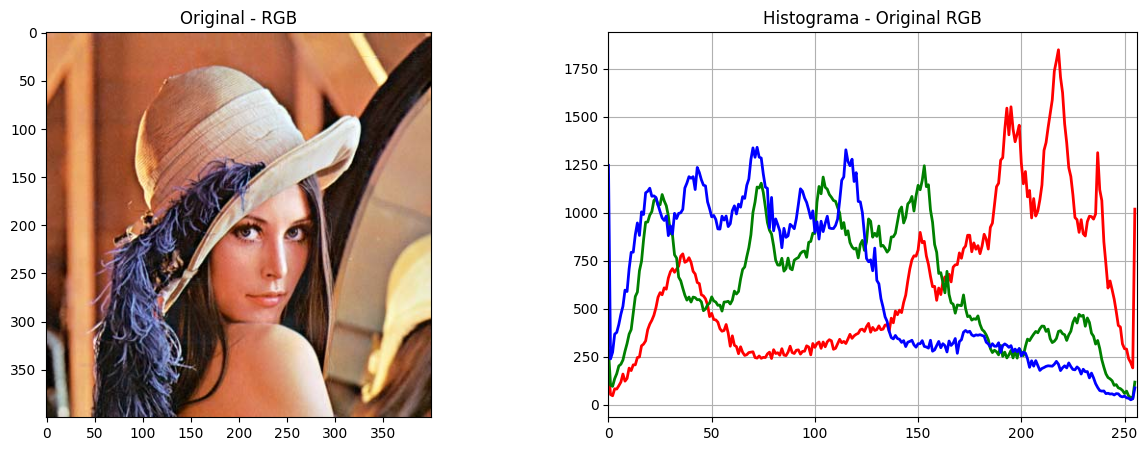

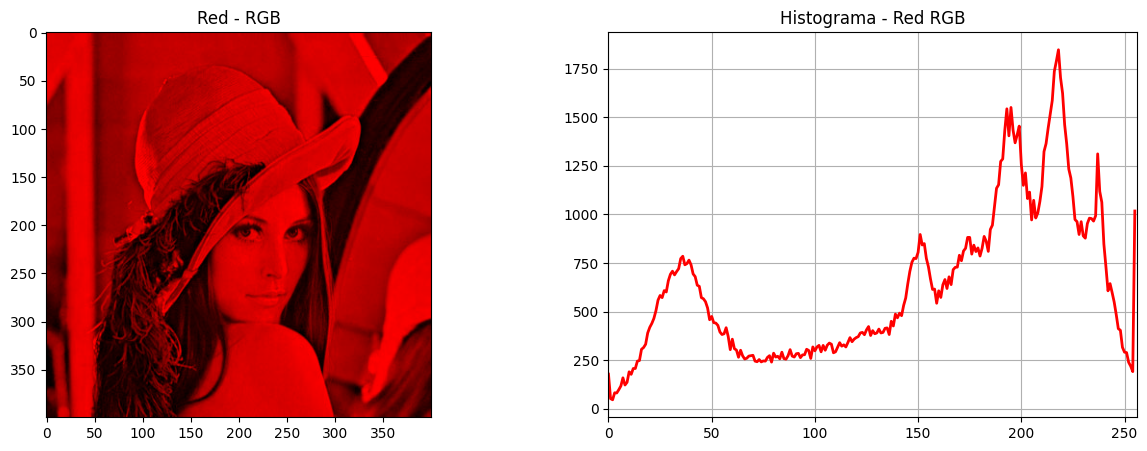

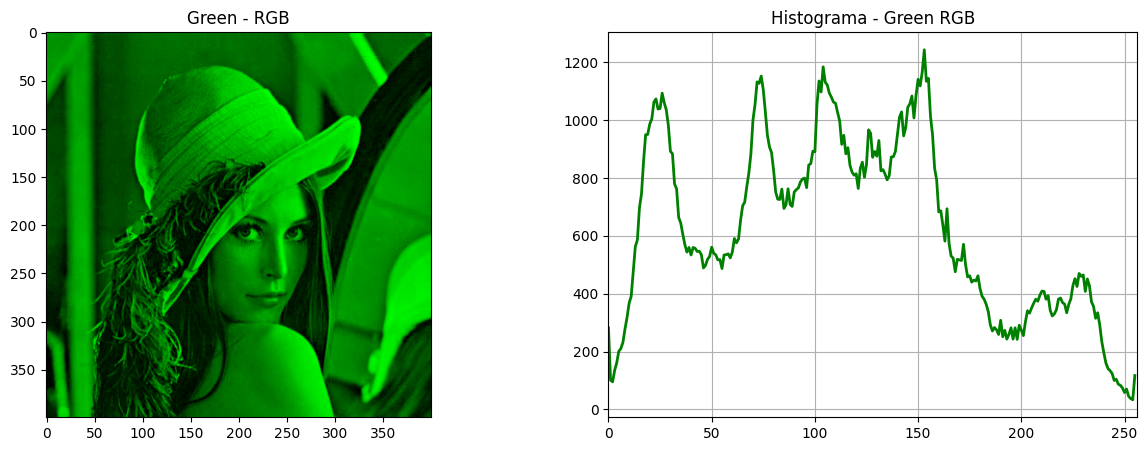

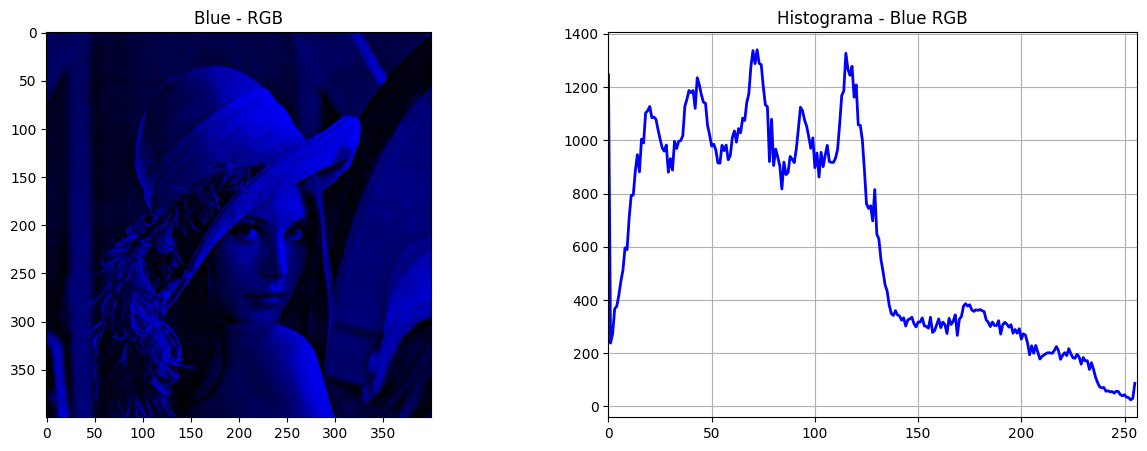

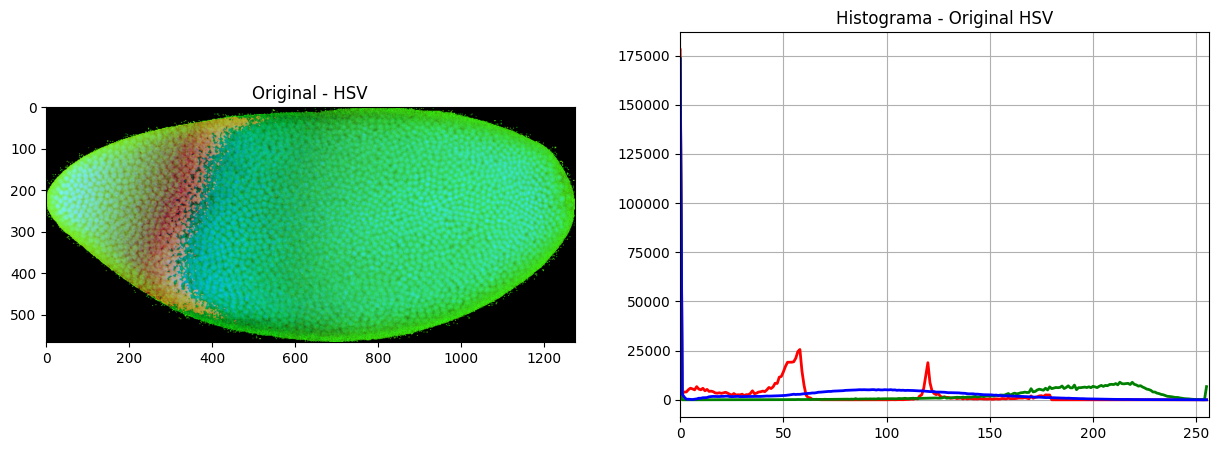

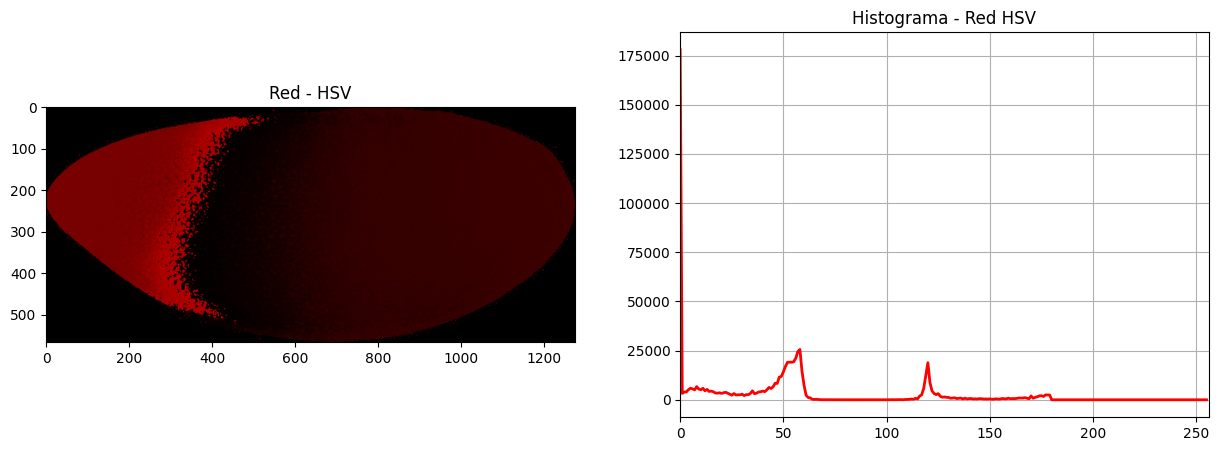

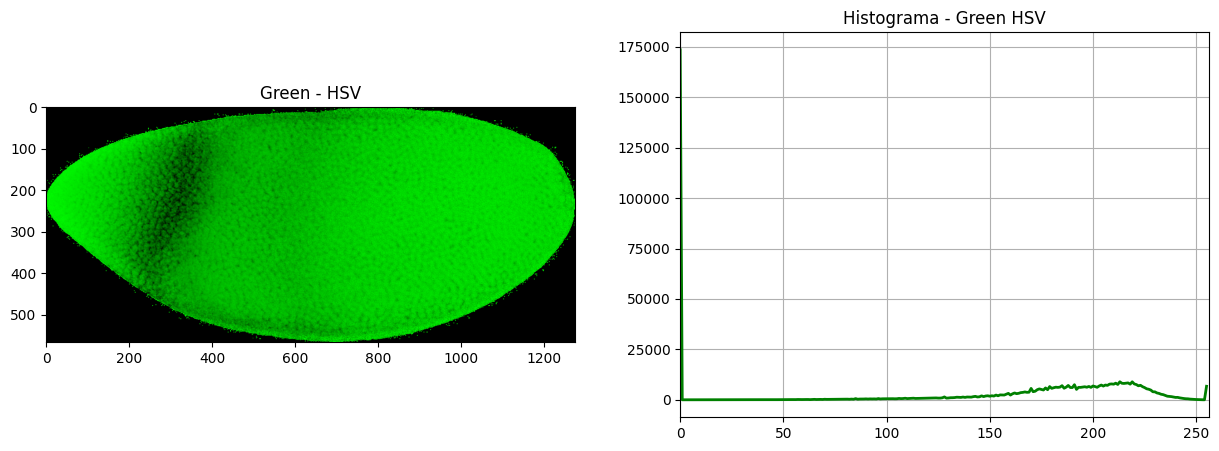

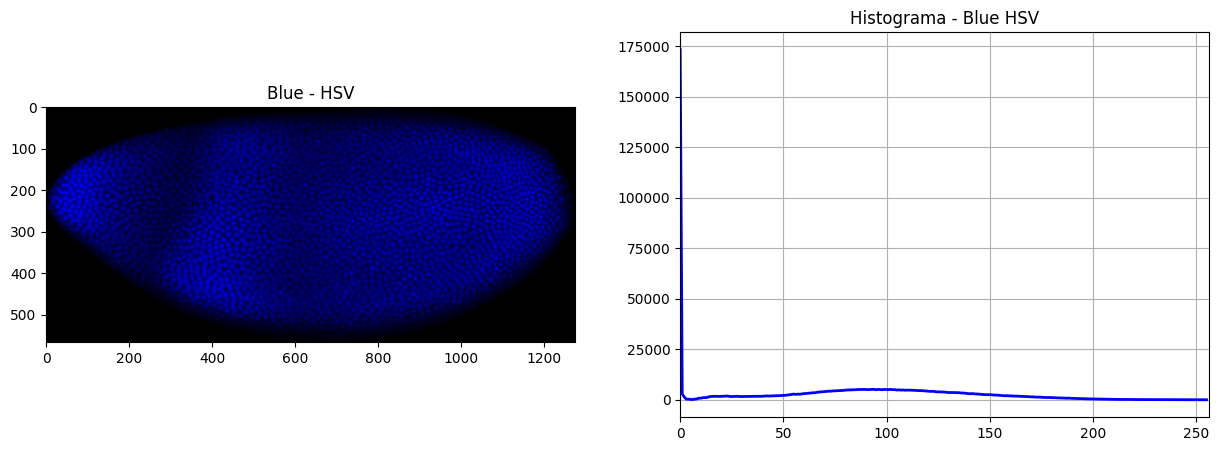

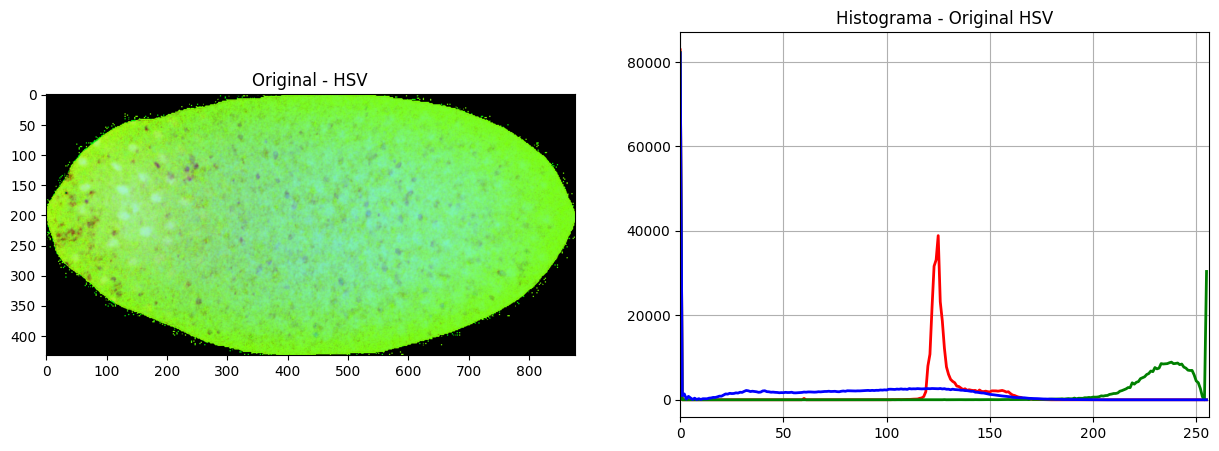

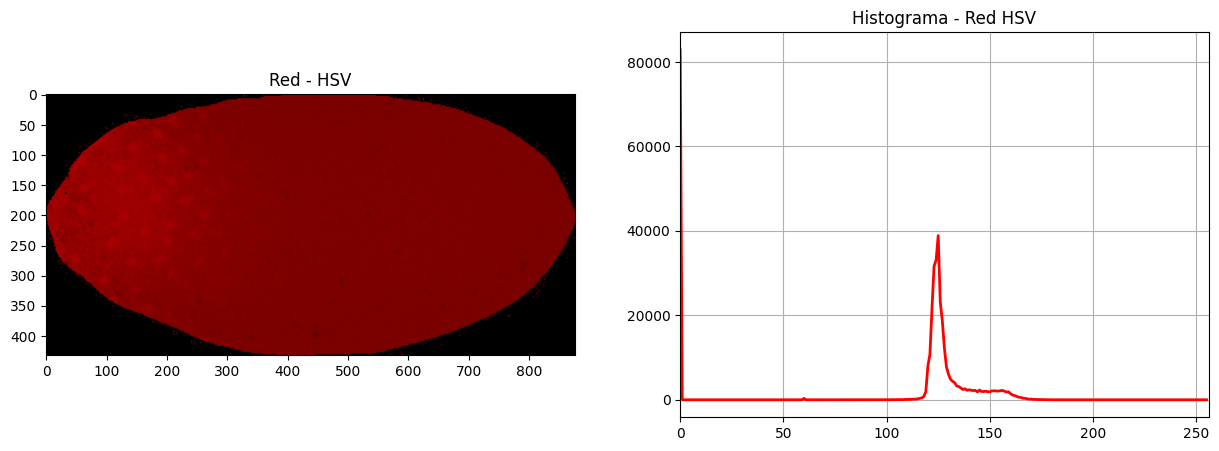

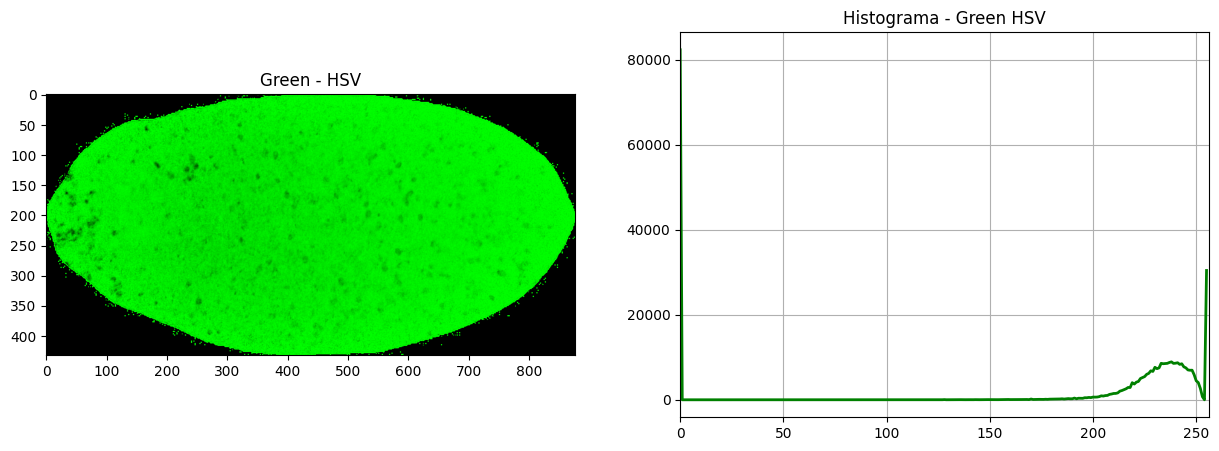

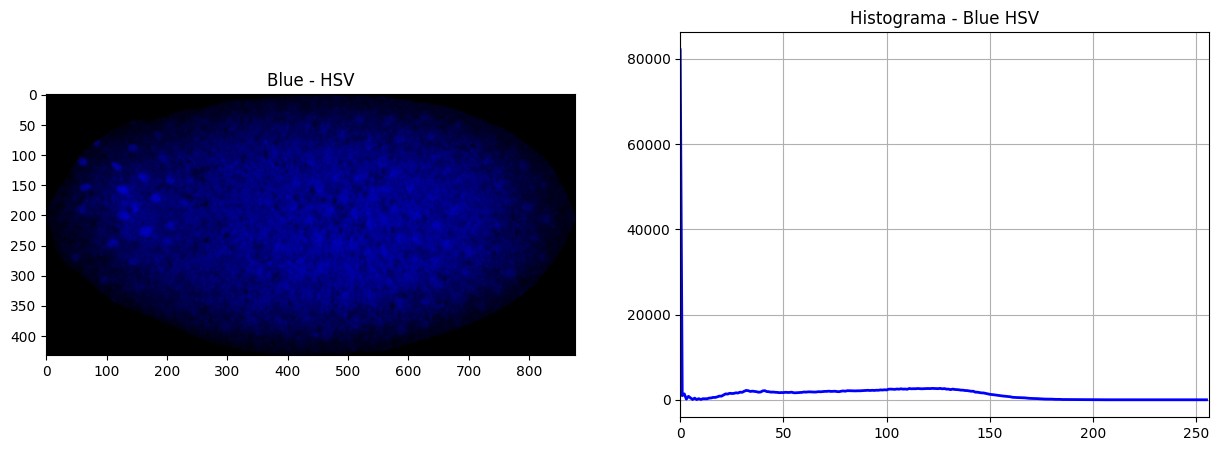

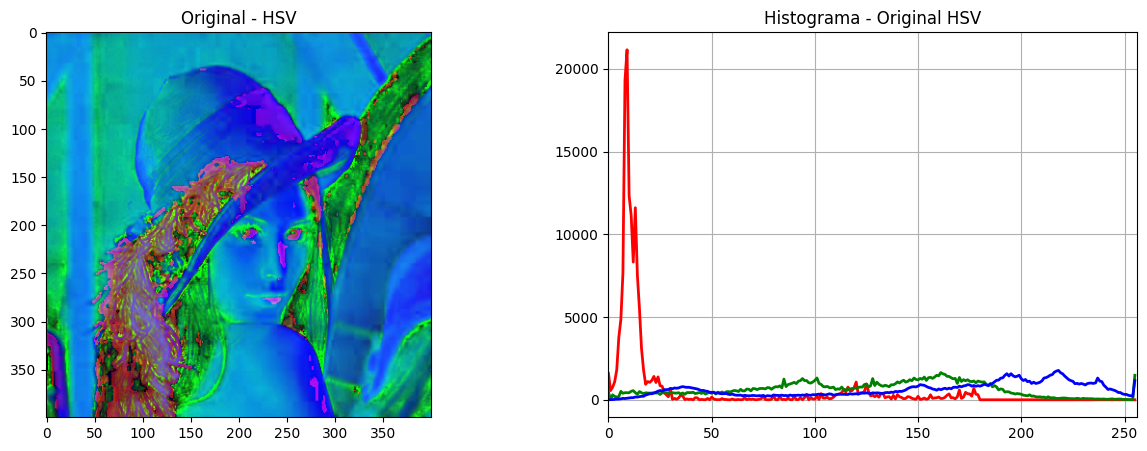

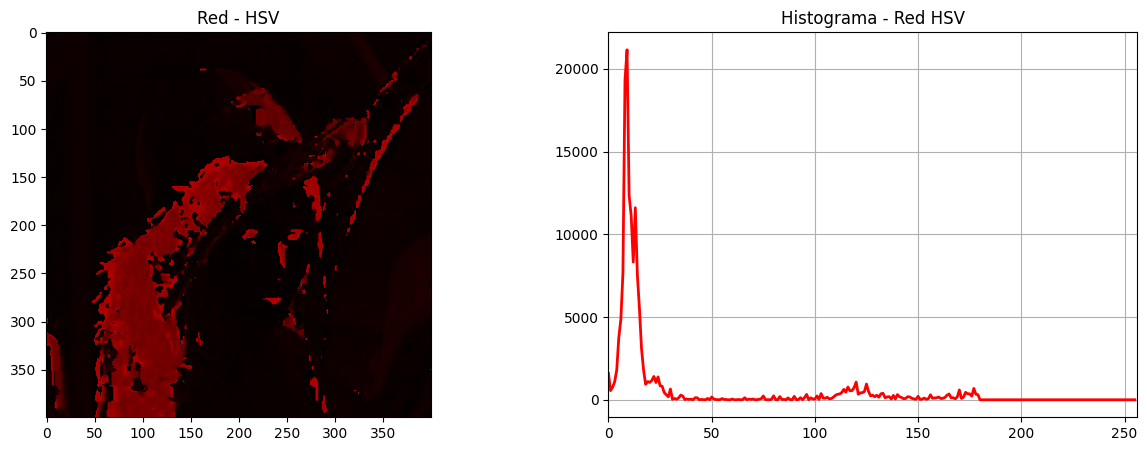

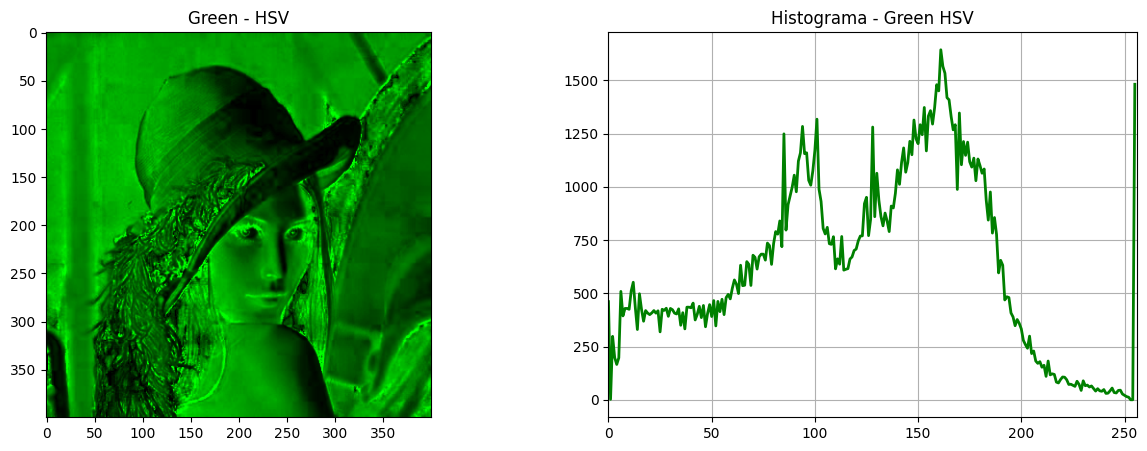

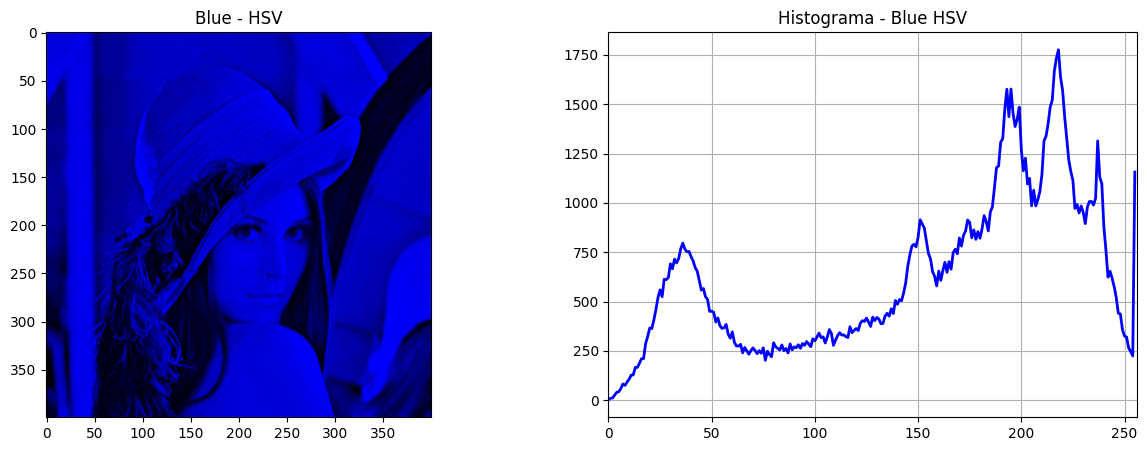

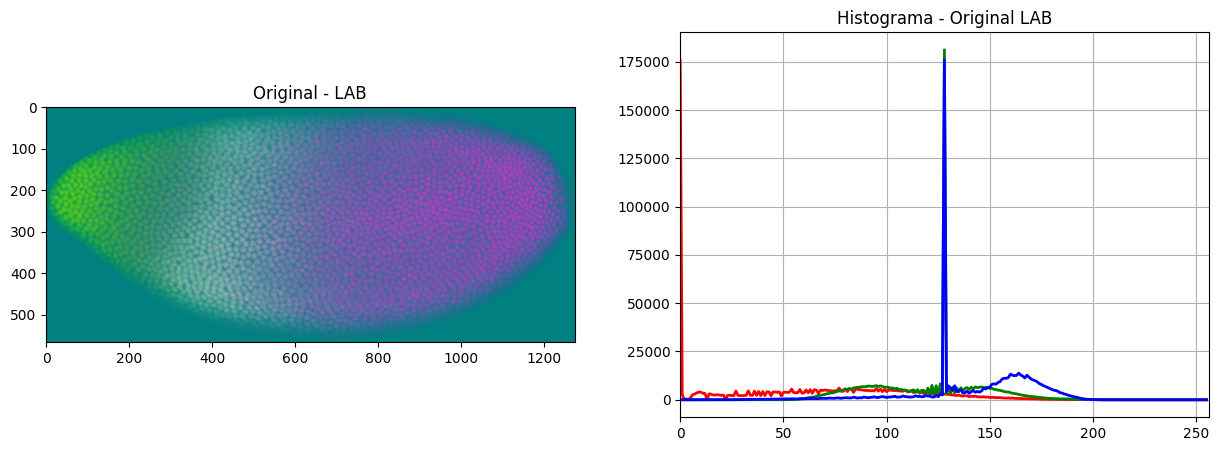

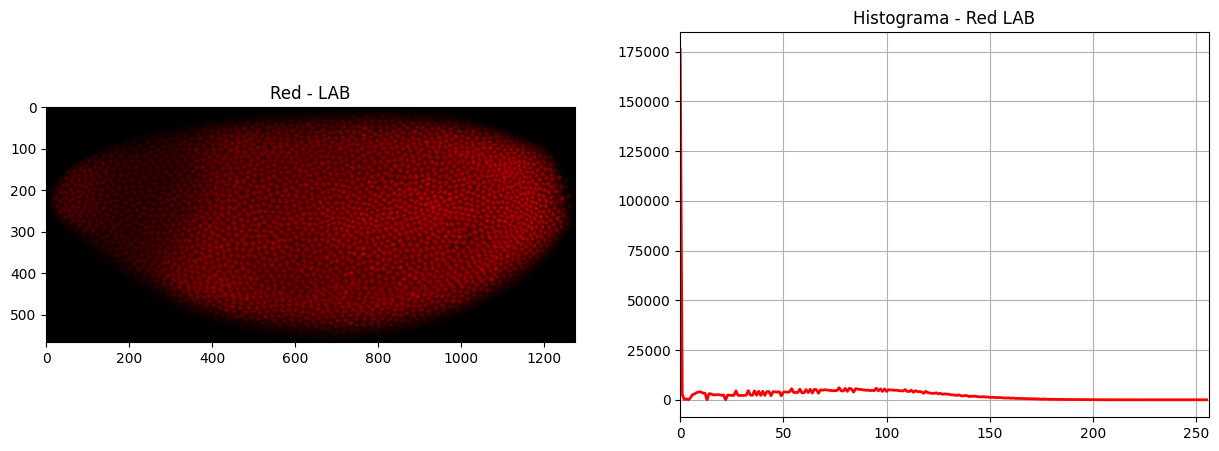

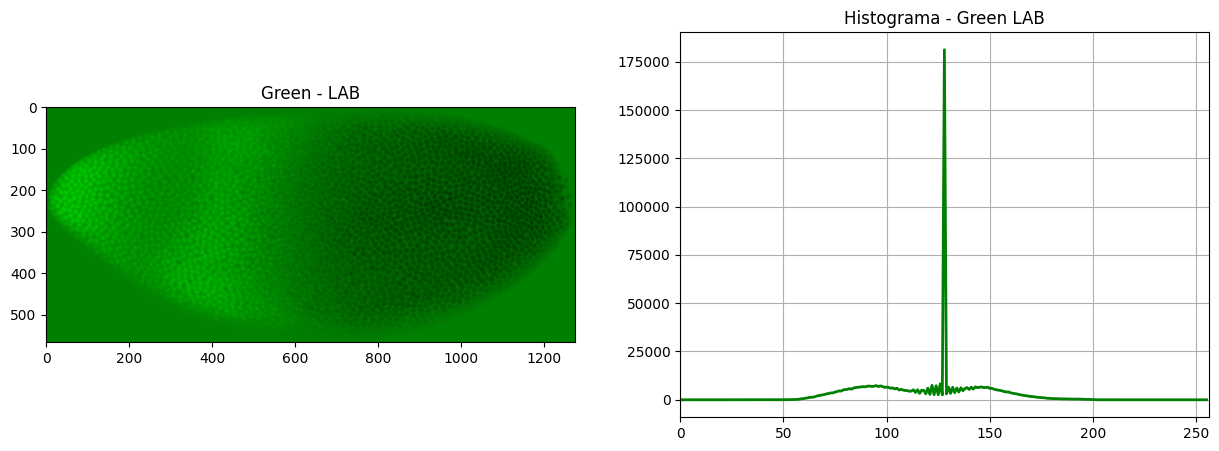

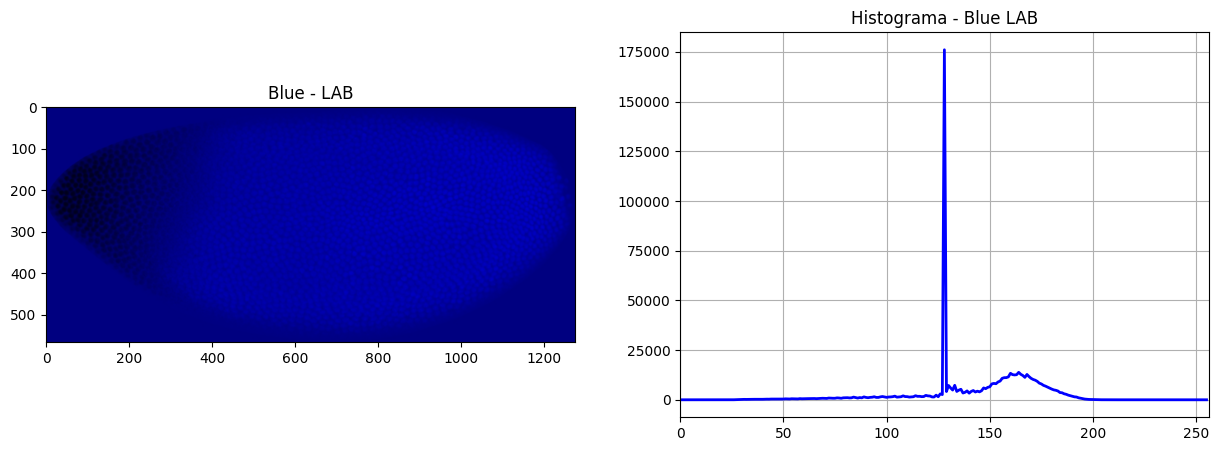

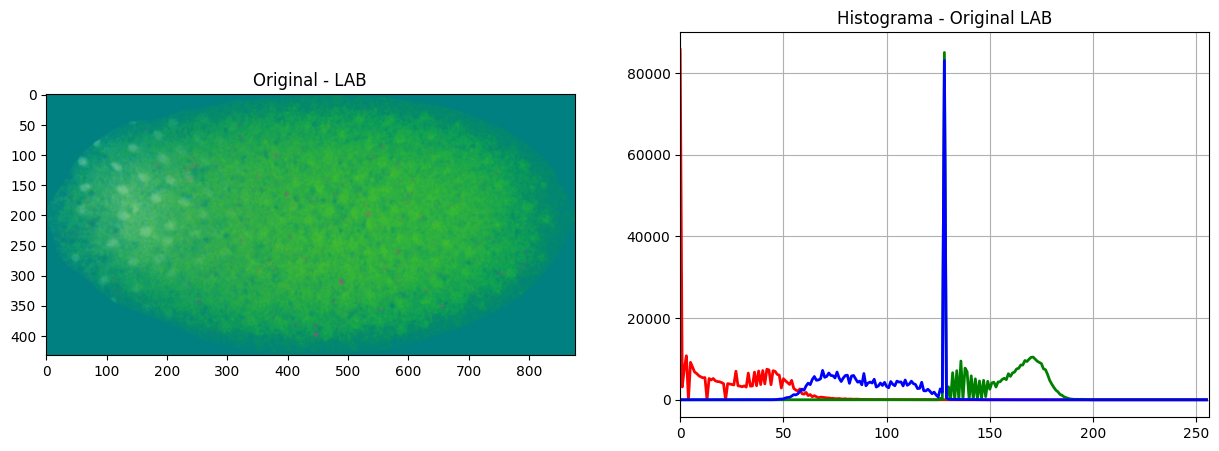

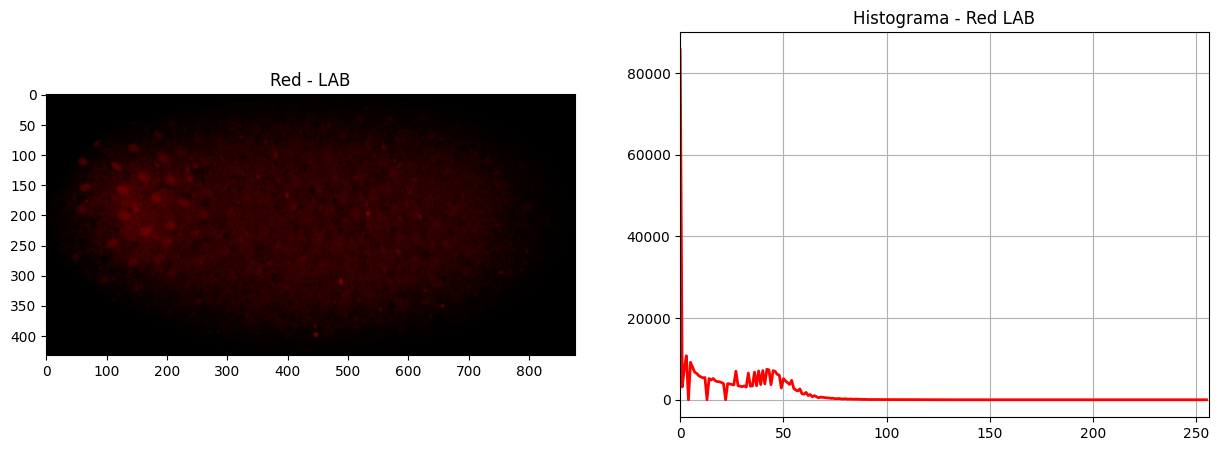

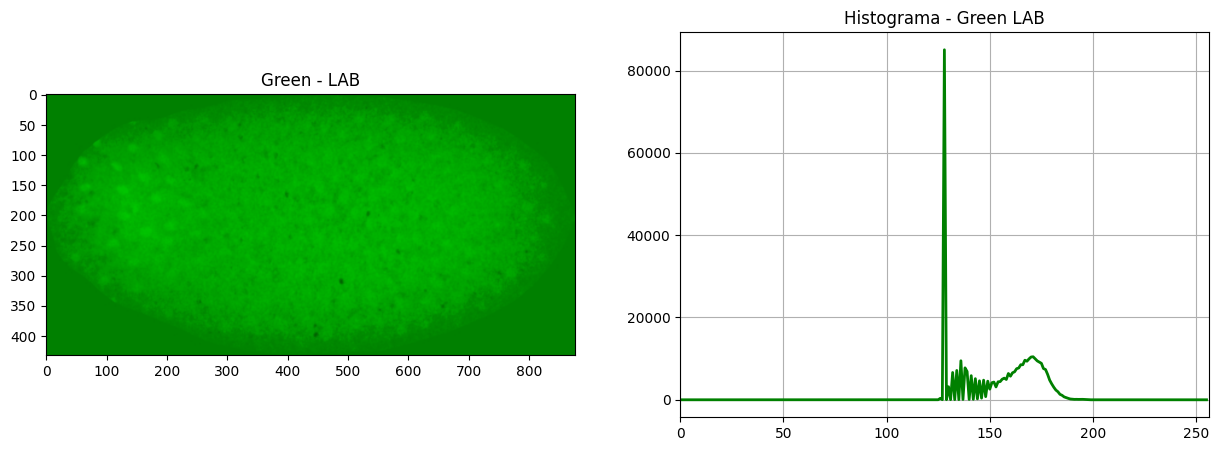

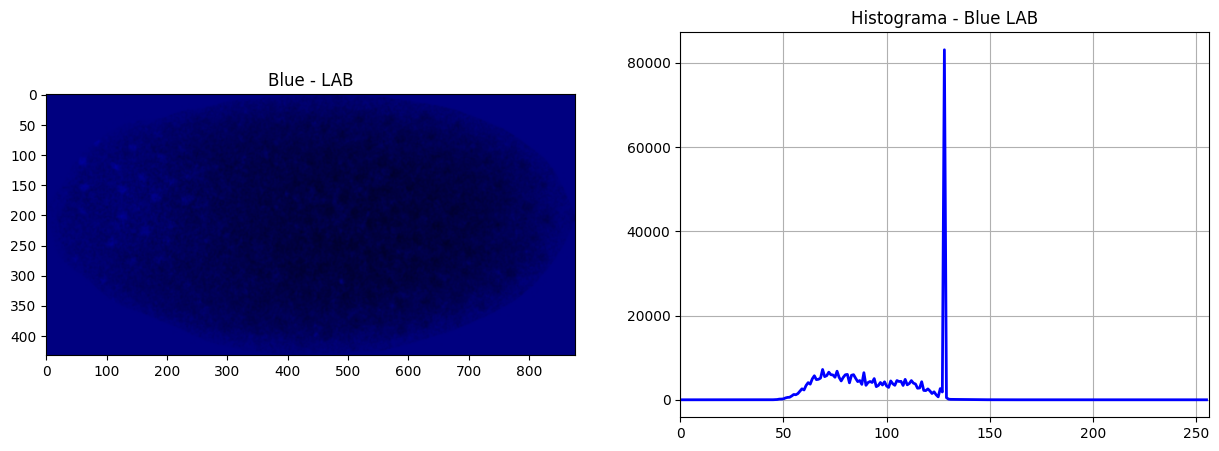

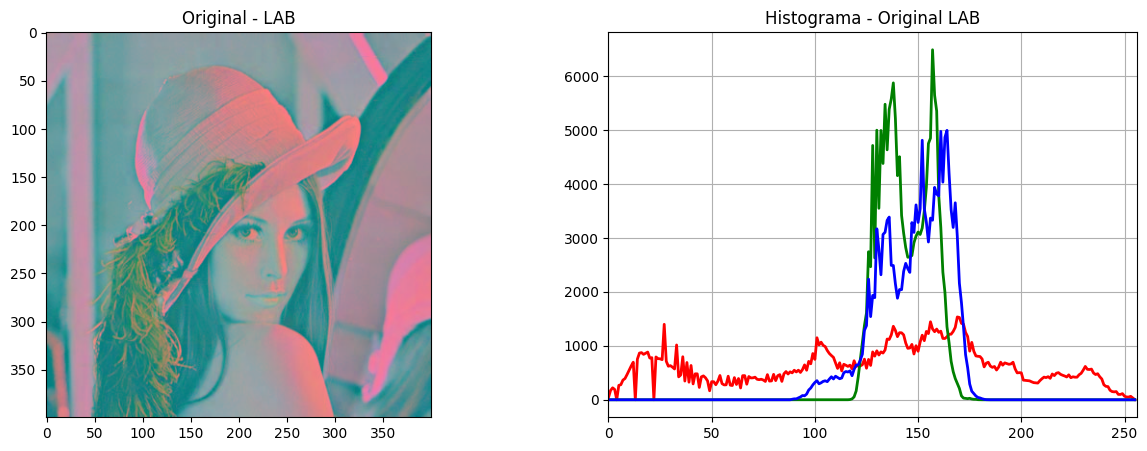

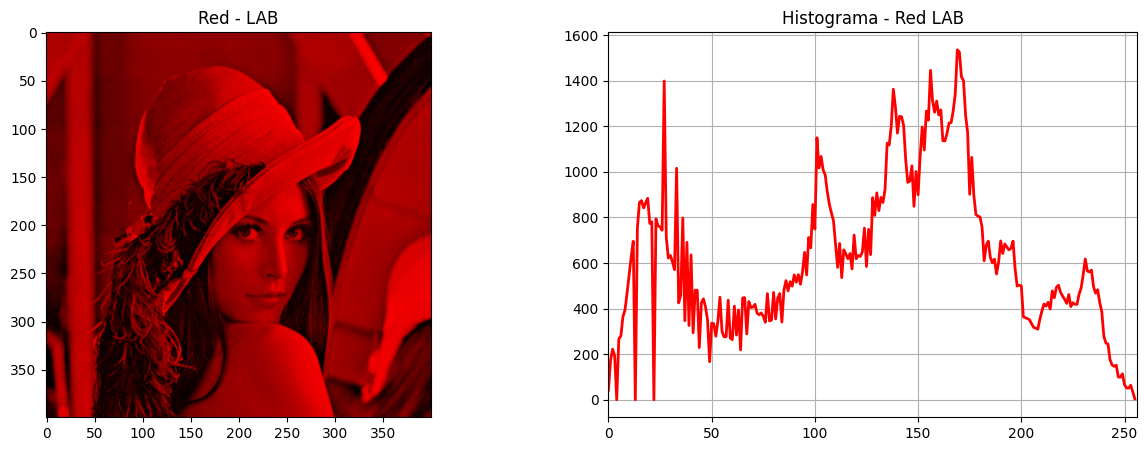

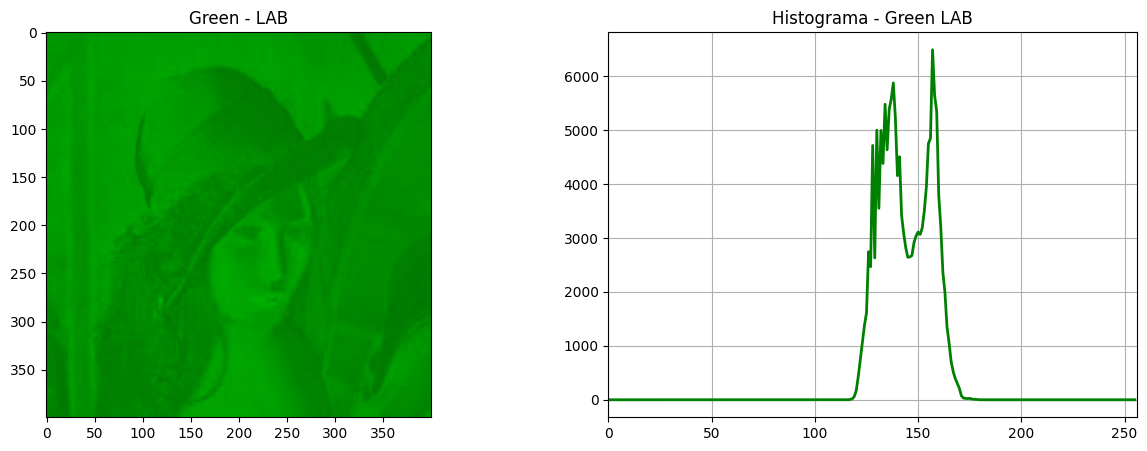

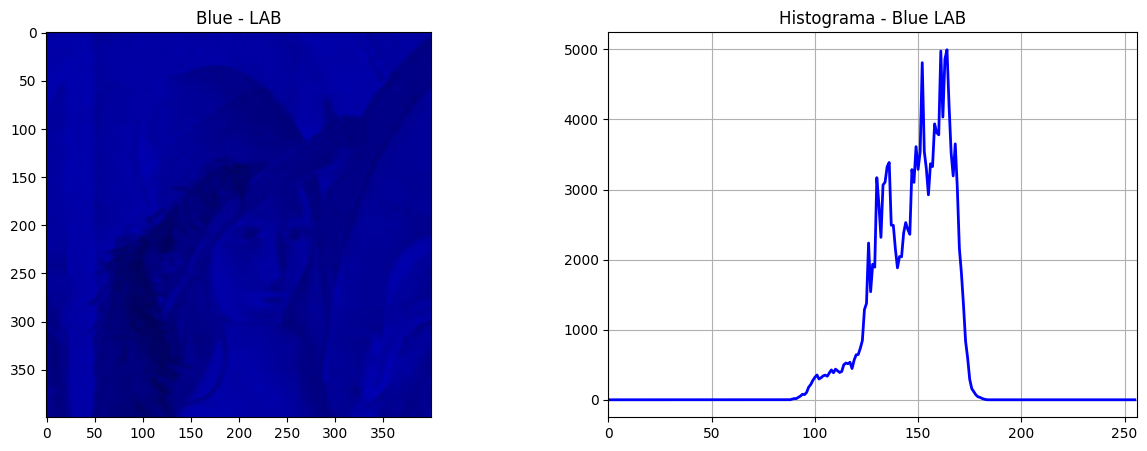

In [3]:
def canais(img, tipo):
    img1 = cv2.imread(img, cv2.IMREAD_COLOR)

    if(tipo == "RGB"):
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    if(tipo == "HSV"):
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
    
    if(tipo == "LAB"):
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
    
    canal1, canal2, canal3 = cv2.split(img2)
    zeros = np.zeros(canal1.shape, np.uint8)
    CANAL1 = cv2.merge((canal1, zeros,zeros))
    CANAL2 = cv2.merge((zeros,canal2,zeros))
    CANAL3 = cv2.merge((zeros,zeros, canal3))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)    
    plt.title("Original - " + tipo)
    plt.imshow(img2)
    
    plt.subplot(1, 2, 2)
    plt.title("Histograma - Original " + tipo)
    color = ('r','g','b')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img2],[i],None,[256],[0,256])
        plt.plot(histr,color=col,lw=2)
        plt.xlim([0,256])
    plt.grid()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("Red - " + tipo)
    plt.imshow(CANAL1)

    plt.subplot(1, 2, 2)
    plt.title("Histograma - Red " + tipo)
    histr = cv2.calcHist([CANAL1],[0],None,[256],[0,256])
    plt.plot(histr,color='red',lw=2)
    plt.xlim([0,256])
    plt.grid()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("Green - " + tipo)
    plt.imshow(CANAL2)

    plt.subplot(1, 2, 2)
    plt.title("Histograma - Green " + tipo)
    histr = cv2.calcHist([CANAL2],[1],None,[256],[0,256])
    plt.plot(histr,color='green',lw=2)
    plt.xlim([0,256])
    plt.grid()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("Blue - " + tipo)
    plt.imshow(CANAL3)  

    plt.subplot(1, 2, 2)
    plt.title("Histograma - Blue " + tipo)    
    histr = cv2.calcHist([CANAL3],[2],None,[256],[0,256])
    plt.plot(histr,color='blue',lw=2)
    plt.xlim([0,256])
    plt.grid()
    plt.show()

canais("image.jpg", "RGB")
canais("image2.jpg", "RGB")
canais("Lenna.jpg", "RGB")

canais("image.jpg", "HSV")
canais("image2.jpg", "HSV")
canais("Lenna.jpg", "HSV")

canais("image.jpg", "LAB")
canais("image2.jpg", "LAB")
canais("Lenna.jpg", "LAB")

2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

In [ ]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img_mand_RGB)

img1 = 255 * (r > 230).astype(int)
img2 = 255 * (b > 210).astype(int)

kernel = Circle(2)
img1 = erosao(img1, kernel)
img2 = erosao(img2, kernel)

kernel = Circle(15)
img1 = dilatacao(img1, kernel)
img1 = erosao(img1, kernel)

kernel = Circle(15)
img2 = dilatacao(img2, kernel)
img2 = erosao(img2, kernel)

img = np.minimum(img1 + img2, 255)

#kernel = Circle(15)
#img = dilatacao(img, kernel)
#img = erosao(img, kernel)

#plt.imshow(img, cmap='gray', vmin=0, vmax=255)

pegar = img / 255

rf = np.multiply(img_mand_RGB[:,:,0], pegar)
gf = np.multiply(img_mand_RGB[:,:,1], pegar)
bf = np.multiply(img_mand_RGB[:,:,2], pegar)

print(rf.max())
print(gf.max())
print(bf.max())

fucinho = cv2.merge((rf,gf,bf))

plt.imshow(fucinho)

3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

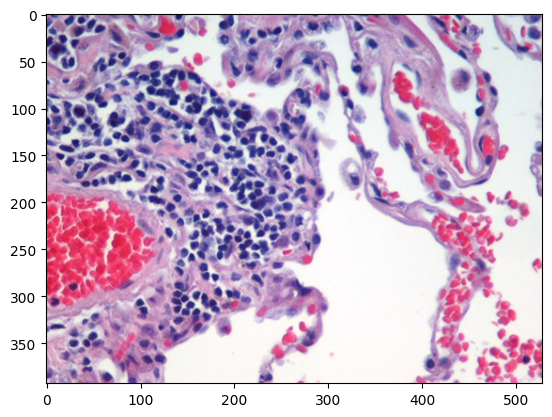

In [5]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
plt.imshow(img_he_RGB);

In [6]:
import cv2
import numpy as np
import urllib.request


resp = urllib.request.urlopen("https://i.stack.imgur.com/NL10Y.jpg")
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

copia = img.copy()
# Extrai as cores entre o intervalo BGR definido
mask = cv2.inRange(img, (0, 0, 0), (60, 60, 60))
## slice no preto
imask = mask > 0
preto = np.zeros_like(img, np.uint8)
preto[imask] = img[imask]

preto = cv2.cvtColor(preto, cv2.COLOR_BGR2GRAY)
cv2.imshow('Preto', preto)

# detecção de círculos
circles = cv2.HoughCircles(preto, cv2.HOUGH_GRADIENT, 1, 100,
                           param1=30, param2=30, minRadius=20, maxRadius=100)

#param do Grab Cut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# pelo menos um círculo encontrado
if circles is not None:
    # converte para int
    circles = np.round(circles[0, :]).astype("int")

    # loop nas coordenadas (x, y) e raio dos círculos encontrados
    for (x, y, r) in circles:
        roi = img.copy()
        r=r+50
        # Desenha o círculo encontrado
        cv2.circle(copia, (x, y), r - 25, (0, 255, 0), 4)
        # Desenha o retângulo do centro do círculo
        cv2.rectangle(copia, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        # Região de interesse com a pupila
        roi = roi[y-r:y+r, x-r:x+r]
        roi_x, roi_y, _ = roi.shape
        #Grab Cut da Pupila
        mask = np.zeros(roi.shape[:2], np.uint8)
        rect = (10, 10,roi_x-10, roi_y-10)
        cv2.grabCut(roi, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        roi_grab = roi * mask2[:, :, np.newaxis]
        # Mostra o Grab Cut
        cv2.imshow("Grab Cut", np.hstack([roi, roi_grab]))

    # Mostra a imagem com o círcuto e centro encontrado pelo Hough Circle
    cv2.imshow("output", np.hstack([img, copia]))
    cv2.waitKey(0)

: 